<a href="https://colab.research.google.com/github/akhil14shukla/Stock-Price-Prediction-using-Brownian-Motion/blob/main/IME625A_Project_Stock_Price_Prediction_using_GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##**DATA EXTRACTION**

Text(0.5, 1.0, 'Historical Data of SBI Stock Price')

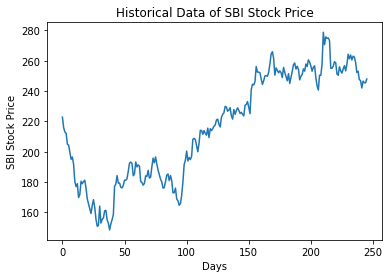

In [318]:
url1 = (r'https://raw.githubusercontent.com/akhil14shukla/Stock-Price-Prediction-using-Brownian-Motion/main/SBIN.NS%20(3).csv')
url2 = (r'https://raw.githubusercontent.com/akhil14shukla/Stock-Price-Prediction-using-Brownian-Motion/main/SBIN.NS.csv')
data1 = pd.read_csv(url1)
data2 = pd.read_csv(url2)

data = data1['Adj Close']
data = data.to_numpy()

actual_prices = data2['Adj Close']
actual_prices = actual_prices.to_numpy()

#Visualizing the data
plt.plot(data)
plt.ylabel('SBI Stock Price')
plt.xlabel('Days')
plt.title('Historical Data of SBI Stock Price')

##**PARAMETER ESTIMATION**

In [319]:
prices = np.array(data)
U_list = np.log(prices[1:]/prices[:-1])
n = len(prices) - 1
Eu = sum(U_list) / float(n)
sigma2 = np.sum((U_list - Eu)**2) / ((n-1))
mu = Eu + sigma2 / 2.0
print(f'\u03bc = {mu}\n\u03c3^2 = {sigma2}\n')

μ = 0.000725377391952974
σ^2 = 0.0005785778513477582



# **SIMULATION**


In [320]:
def stock_price(data, days, num_samples):

	samples = []
	for num in range(num_samples):
		S_prev = prices[-1]
		for i in range(days):
			S = S_prev * np.exp((mu - sigma2/2) + np.sqrt(sigma2)*np.random.normal(0,1))
			S_prev = S
		samples.append(S)

	samples = np.array(samples)
	expected_price = np.mean(samples)
	return expected_price

days = np.arange(1, len(actual_prices)+1,1)
num_samples = 50
np.random.seed(0)
prices = np.array(data)
expected_prices = []
for i in range(0,len(days)):
	expected_prices.append(stock_price(data, days[i], num_samples))
expected_prices = np.array(expected_prices)
expected_prices = np.insert(expected_prices,0,prices[-1])
actual_prices = np.insert(actual_prices,0,prices[-1])

##**DATA COMPARISON**##

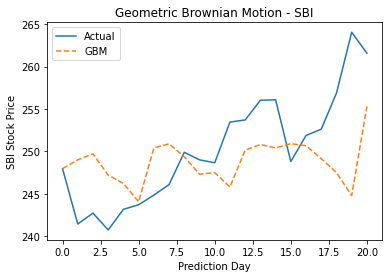

In [321]:
plt.plot(actual_prices, label = 'Actual')
plt.plot(expected_prices, label = 'GBM', ls='--')

plt.ylabel('SBI Stock Price')
plt.xlabel('Prediction Day')
plt.title('Geometric Brownian Motion - SBI')

plt.legend(loc = 'upper left')